In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bin_maker(data_img):
    binary_array=np.unpackbits(data_img, axis=-1)
    binary_array=binary_array.reshape(data_img.shape[0],data_img.shape[1],-1,2)
    flat_array=binary_array.flatten()
    return flat_array,len(flat_array)

In [3]:
def bin_pack(data_img):
    binary_array=data_img.reshape(64,64,4,2)
    # Reshape the grouped binary array to match the original shape
    reshaped_array = binary_array.reshape(binary_array.shape[0],binary_array.shape[1], -1)

    # Convert each grouped binary representation back to integers
    int_array = np.packbits(reshaped_array, axis=-1).reshape(binary_array.shape[0],binary_array.shape[1])

    return int_array


In [4]:
def hide_image(cover_path, secret_path, output_path):
    cover = cv2.imread(cover_path, cv2.IMREAD_GRAYSCALE)
    secret = cv2.imread(secret_path, cv2.IMREAD_GRAYSCALE)
    
    secret_rs = cv2.resize(secret, (64, 64), cv2.INTER_AREA)
    
    bin_array, size = bin_maker(secret_rs)
    
    stego = np.copy(cover)
    rows, cols = cover.shape
    
    index = 0
    
    for row in range(rows):
        for col in range(cols):
            cover_pixel = cover[row, col]
            secret_bit = bin_array[index]
            modified_pixel = (cover_pixel & 0xFE) | secret_bit
            stego[row, col] = modified_pixel
            index += 1
            if index == size:
                break
        if index == size:
            break
        
    cv2.imwrite(output_path, stego)
    print("Image hidden successfully")

In [5]:
def reveal_image(stego_path, output_path):
    stego = cv2.imread(stego_path, cv2.IMREAD_GRAYSCALE)
    revealed = np.zeros(32768,dtype=int)
    
    size = 32768  # Assuming 64x64 secret image
    index = 0
    rows, cols = stego.shape

    for row in range(1,rows):
        for col in range(cols):
            stego_pixel = stego[row, col]
            # Extract the least significant bit as the secret pixel's value
            revealed_pixel = (stego_pixel & 0x01)<<7  # Correctly extracting the LSB
            revealed[index] = revealed_pixel
            index += 1
            if index == size:
                break
        if index == size:
            break
    revealed=bin_pack(revealed)
    cv2.imwrite(output_path, revealed)
    print("Secret image revealed successfully!")


In [6]:
img_data='elaine.tiff'
img_mule='lena.tiff'

stego_output="StegoImage.bmp"
Extracted_output="ExtractedImage.bmp"

hide_image(img_mule,img_data,stego_output)



Image hidden successfully


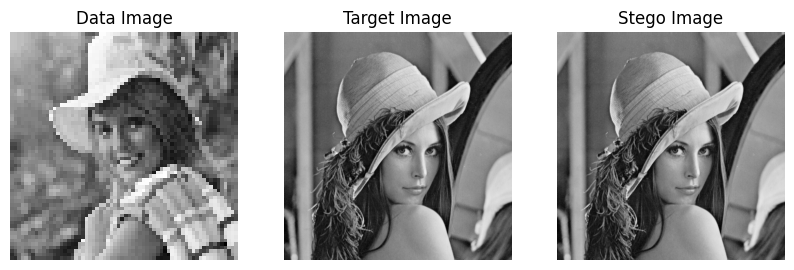

In [7]:
img_target=cv2.imread(img_mule,cv2.IMREAD_GRAYSCALE)
img_secret=cv2.imread(img_data,cv2.IMREAD_GRAYSCALE)
img_secret=cv2.resize(img_secret,(64,64),cv2.INTER_AREA)
img_steg=cv2.imread(stego_output,cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_secret, cmap='gray')
plt.title("Data Image")

plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_target, cmap='gray')
plt.title("Target Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_steg, cmap='gray')
plt.title("Stego Image")
plt.axis("off")

plt.show()


In [8]:
reveal_image(stego_output,Extracted_output)

Secret image revealed successfully!


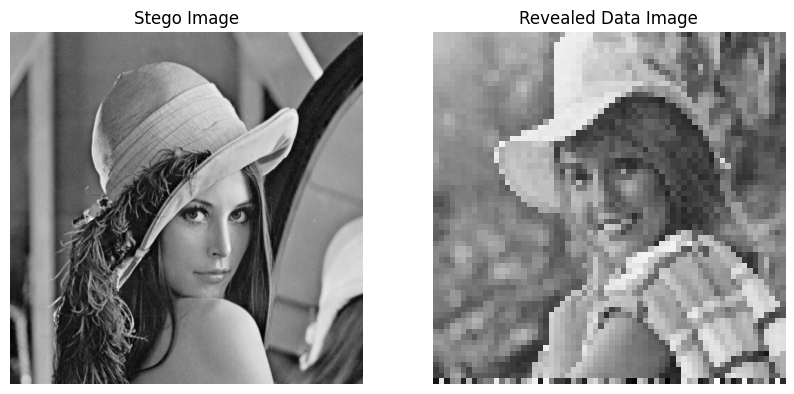

In [9]:
img_steg=cv2.imread(stego_output,cv2.IMREAD_GRAYSCALE)
img_reveal=cv2.imread(Extracted_output,cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_steg, cmap='gray')
plt.title("Stego Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_reveal, cmap='gray')
plt.title("Revealed Data Image")
plt.axis("off")


plt.show()